# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<AxesSubplot:>

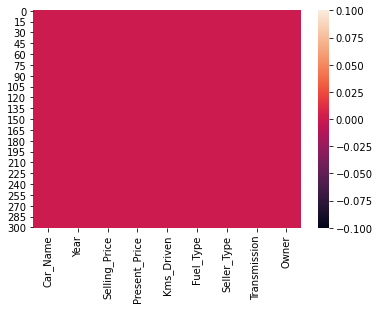

In [4]:
sns.heatmap(df.isnull())

In [5]:
df=df.drop(['Car_Name'],axis=1)

In [6]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df['YEAR']=2020

In [8]:
df['AGE']=df['YEAR']-df['Year']

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,YEAR,AGE
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [10]:
df1=df.drop(['YEAR','Year'],axis=1)

In [11]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,AGE
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

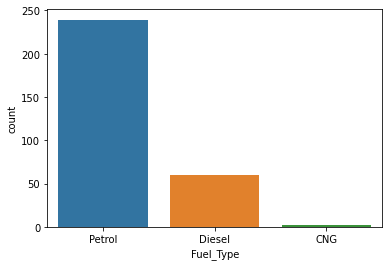

In [12]:
sns.countplot(x='Fuel_Type',data=df1)

<AxesSubplot:xlabel='Transmission', ylabel='count'>

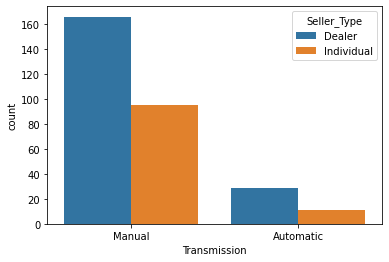

In [13]:
sns.countplot(x='Transmission',hue='Seller_Type',data=df1)

In [14]:
df1['AGE'].unique()

array([ 6,  7,  3,  9,  2,  5,  4, 11, 10,  8, 17, 12, 14, 15, 16, 13],
      dtype=int64)

In [15]:
df1.shape

(301, 8)

In [16]:
df1.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,AGE
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,6.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,2.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000
50%,3.600000,6.400000,32000.000000,0.000000,6.000000
75%,6.000000,9.900000,48767.000000,0.000000,8.000000
max,35.000000,92.600000,500000.000000,3.000000,17.000000


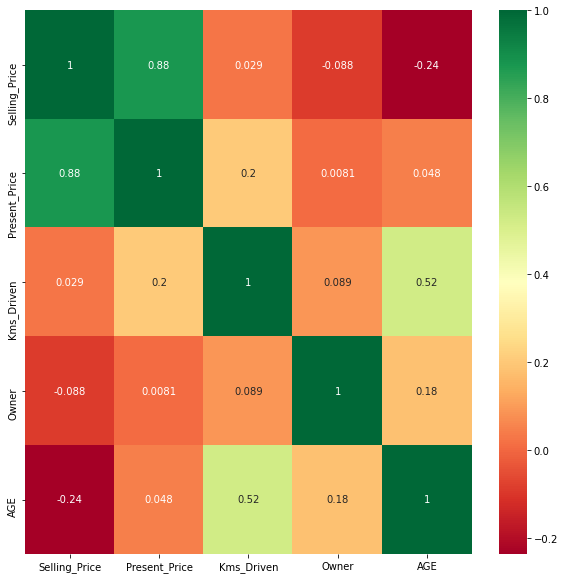

In [17]:
corrmat=df1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
#To plot heatmap
import seaborn as sns
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
df1['AGE'].unique()

array([ 6,  7,  3,  9,  2,  5,  4, 11, 10,  8, 17, 12, 14, 15, 16, 13],
      dtype=int64)

In [19]:
df1['Owner'].unique()

array([0, 1, 3], dtype=int64)

# One hot encoding

In [20]:
df2=pd.get_dummies(df1,drop_first=True)

In [21]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,AGE,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [22]:
final_df=df2.drop(['Owner'],axis=1)

In [23]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,AGE,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,6,0,1,0,1
1,4.75,9.54,43000,7,1,0,0,1
2,7.25,9.85,6900,3,0,1,0,1
3,2.85,4.15,5200,9,0,1,0,1
4,4.60,6.87,42450,6,1,0,0,1


# Assigning Columns for X and y

In [24]:
X=final_df.iloc[ :, 1:]

In [25]:
X

,Present_Price,Kms_Driven,AGE,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,6,0,1,0,1
1,9.54,43000,7,1,0,0,1
2,9.85,6900,3,0,1,0,1
3,4.15,5200,9,0,1,0,1
4,6.87,42450,6,1,0,0,1
...,...,...,...,...,...,...,...
296,11.60,33988,4,1,0,0,1
297,5.90,60000,5,0,1,0,1
298,11.00,87934,11,0,1,0,1
299,12.50,9000,3,1,0,0,1


In [26]:
y=df2.iloc[ :, :1]

In [27]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [28]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

<AxesSubplot:>

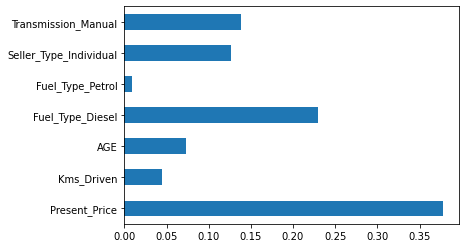

In [29]:
#To plot feature importances
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.plot(kind='barh')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Hyperparameter Tuning

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model1 = RandomForestRegressor(n_estimators=50, max_depth=10, max_features='log2')

param_grid = {
    'n_estimators' : [10,1000],
    'max_depth': [1,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0,300]
}


CV_rf = GridSearchCV(estimator=model1, param_grid=param_grid, cv= 5)
CV_rf.fit(X, y)
print (CV_rf.best_params_)

{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 10, 'random_state': 300}


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth= 100, max_features= 'auto', n_estimators= 10, random_state=300)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [38]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1690491803278689
Mean Squared Error: 9.961041278688525
Root Mean Squared Error: 3.1561117341894795


In [39]:
#To concatinate
pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual Selling Price","Predicted Selling Price"])

,Actual Selling Price,Predicted Selling Price
0,2.65,2.830
1,3.00,2.585
2,7.50,7.810
3,6.75,6.760
4,11.25,9.819
...,...,...
56,6.10,5.620
57,33.00,21.573
58,7.50,7.219
59,5.25,5.795
